<img src="https://colombiaestudia.com/wp-content/uploads/2022/02/unad.png" width="220" height="140" align="center"/>


<p align="center">Análisis de Datos</p>


<p align="center"> Grupo: 10 </p>

 <p align="center"> Tarea 4 - Algoritmos de Aprendizaje no Supervisado</p>

 <p align="center">  Presentado por: </p>
 <ul>
    <li>Hugo Andres Marrugo Polo</li>
    <li>Jesus David Silva Rangel</li>
    <li>Yeiner Domínguez</li>
 </ul> 

<p align="center"> Código: 202016908</p>

 <p align="center">  Tutor: Breyner Alexander Parra</p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>

<p align="center"> 2024</p>

# Agrupamiento en Hierarchical Clustering


## Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenido.s
8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/


### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')




El **Hierarchical Clustering** es una técnica de clustering no supervisado que permite agrupar a los clientes según sus comportamientos o características comunes.es un conjunto de datos utilizado comúnmente en análisis de marketing, en particular para realizar segmentaciones de clientes, análisis de comportamiento y optimización de campañas publicitarias.  
 
 **Este dataset contiene información de clientes de un mall. Las variables incluyen género, ingreso, puntaje de gasto, etc.**

In [2]:
# Cargar el conjunto de datos en la variable data
data = pd.read_csv('Mall_Customers.csv', sep=',')


In [3]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**CustomerID:** identificador único para cada cliente. 

**Gender:** Genero del Cliente(Masculino-Femenino) 

**Age:** Edad del Cliente. 

**Annual Income:** Ingreso Anual. 

**Spending Score:** Puntaje de Gasto.


<h2>Informacion Estadistica del Dataset<h2>

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<h2>Obtener información sobre el tipo de datos y el total de valores en cada columna<h2>


In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Explicación resultado:
* Tipo de Datos (<class 'pandas.core.frame.DataFrame'>):
Esto indica que el objeto que has cargado es un DataFrame, que es una tabla de datos similar a una hoja de cálculo de Excel o una tabla SQL, donde las filas y columnas se indexan y etiquetan.

* RangeIndex: 200 entries, 0 to 199:
El índice del DataFrame tiene 200 filas, numeradas desde 0 hasta 199. Esto significa que hay ¨**200 registros (clientes, en este caso).**

* Data columns (total 4 columns):aa  CustomerID, Gender,Age,Annual Income, Spending Score.
  
* Non-Null Count: Cada columna tiene 200 valores no nulos, lo que indica que no hay datos faltantes en este conjunto de datos para estas variables.

* Dtype: Todas las columnas tienen el tipo de dato int64, excepto la columna Gender.


<h2>Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario<h2>

<h2>Datos nulos y valores atipicos<h2>

In [6]:
#verificar Valores Nulos
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**No existen valores Nulos en el dataset de Datos** 


<h2>Detectar Atipicos<h2>
    

In [7]:
#Extraer columnas numericas
columnas_numericas = data.select_dtypes(include=['number'])
columnas_numericas




,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


<h2>Datos Atipicos, usando una funcion aplicando Rango Intercualitico<h2> 
     

**En este caso queremos encontrar solo valores extremos, por eso multiplicamos 3 veces el IQR**

In [8]:
# Función para detectar valores atípicos Extremos Usando rango Intercualtilico
def detectar_atipicos(data):
    Q1 = data.quantile(0.25)  # Primer cuartil
    Q3 = data.quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    limite_inferior = Q1 - 3 * IQR  # Límite inferior
    limite_superior = Q3 + 3 * IQR  # Límite superior
    return data[(data < limite_inferior) | (data > limite_superior)]

#  Aplicar la función a cada columna numérica y guardar resultados
valores_atipicos = {}

#Se guardan los valores atipicos en el diccionario "valores_atipicos"
for col in columnas_numericas:
        atipicos = detectar_atipicos(data[col])
        valores_atipicos[col] = atipicos
valores_atipicos

{'CustomerID': Series([], Name: CustomerID, dtype: int64),
 'Age': Series([], Name: Age, dtype: int64),
 'Annual Income (k$)': Series([], Name: Annual Income (k$), dtype: int64),
 'Spending Score (1-100)': Series([], Name: Spending Score (1-100), dtype: int64)}

**No se Encuentran valores atipicos**

### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Analizamos las variables y la correlacion que existen entre ellas, buscando encontrar las caracteristicas mas importantes al momento de entrenar el modelo de Hierarchical Clustering,

### Analizamos si el genero de los clientes influye en el puntaje de gasto , teniendo en cuenta que un puntaje de gasto mas alto indica que el cliente es recurrente en la tienda 

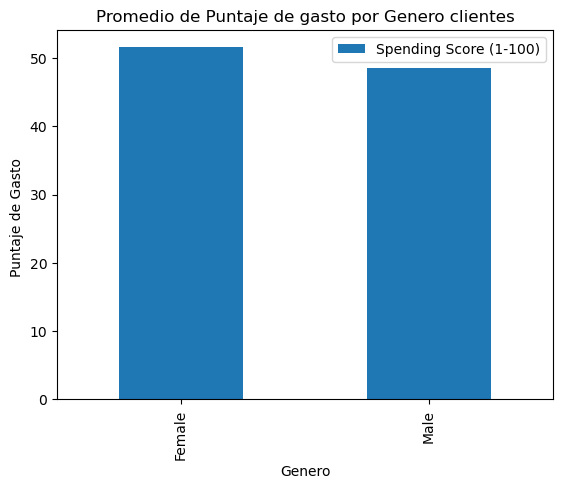

In [9]:
genero_puntaje= data.groupby("Gender")["Spending Score (1-100)"].mean().sort_values(ascending=False)

# Crear el gráfico de barras
genero_puntaje.plot(kind="bar", legend=True)
plt.title('Promedio de Puntaje de gasto por Genero clientes')
plt.xlabel('Genero')
plt.ylabel('Puntaje de Gasto ')
plt.show()

**Analsis**: El genero no Marca una tendencia fuerte en el consumo de los clientes en la tienda, siendo el genero feminino con un puntaje un poco mas alto que el masculino.

### Analizamos si la Edad de los clientes influye en el Ingreso Mensual , teniendo en cuenta que un ingreso mensual mayor puede indicar un puntaje de gasto mas alto.

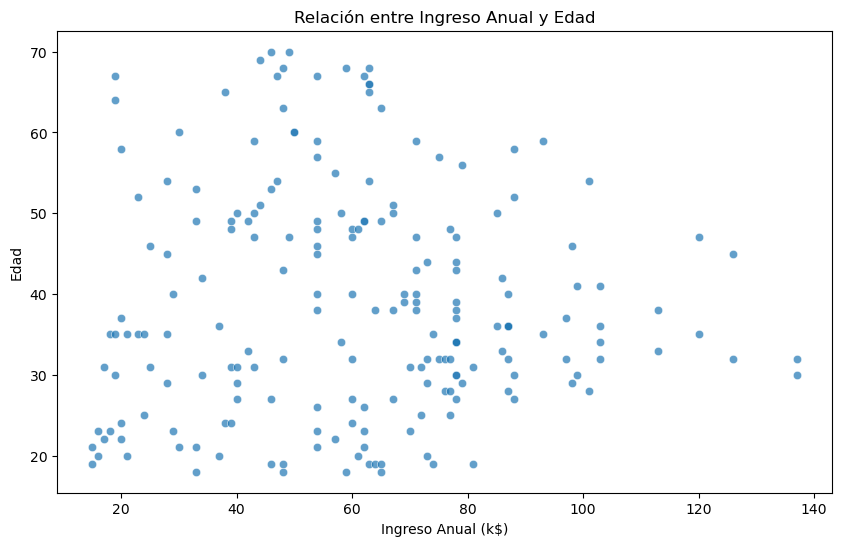

In [10]:
# Gráfico de dispersión entre Ingreso y Edad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Age', alpha=0.7)
plt.title('Relación entre Ingreso Anual y Edad')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Edad')
plt.show()

**Analisis:** En su mayoria los clientes que tienen mayor ingreso son aquellos que se acercan a la edad de 30 años hasta los casi 50 años, edad donde esta capacidad adquistica y de ingresos comienza a decaer.

### Analizamos si los ingresos anuales de los clientes influye en el Puntaje de gasto , teniendo en cuenta que un puntaje de gasto mas alto indica que el cliente es recurrente en la tienda.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


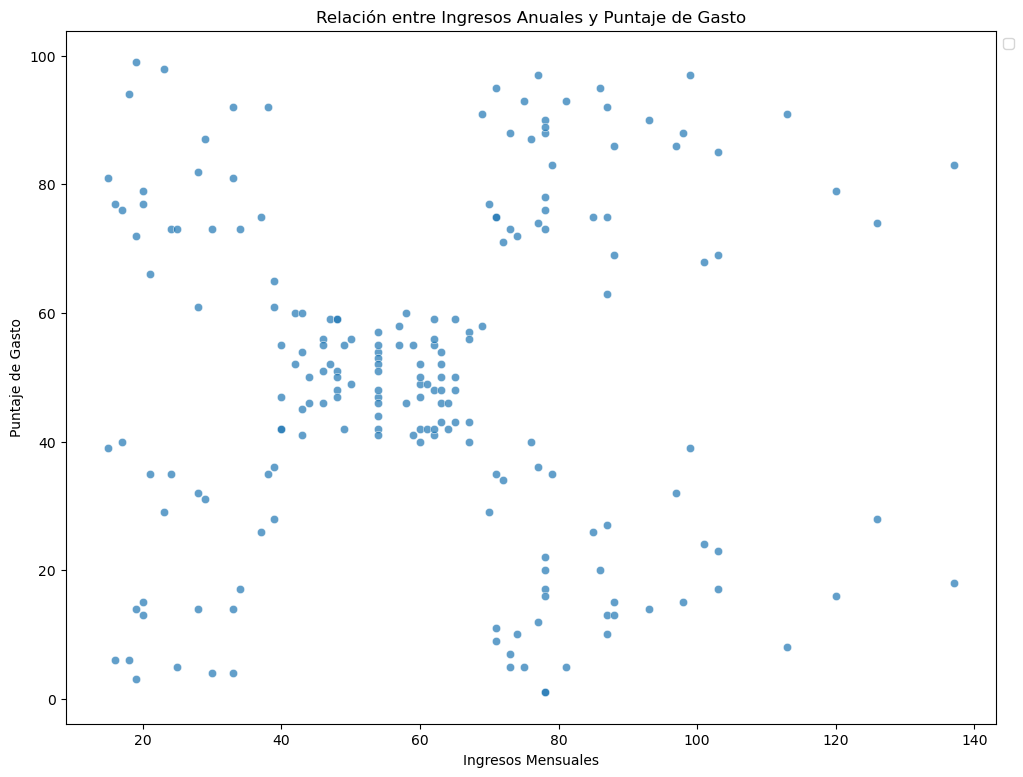

In [11]:
# Gráfico de dispersión entre Ingresos y Puntaje de gasto
plt.figure(figsize=(12, 9))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', alpha=0.7)
plt.title('Relación entre Ingresos Anuales y Puntaje de Gasto')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Puntaje de Gasto')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

**Analisis:** Esta grafica señala una fuerte correlacion entre los ingresos anuales y los puntajes de gastos, donde se pueden notar ciertos grupos o clusters que se generan en funcion de los ingresos anuales. **Esta grafica se utilizara como referencia para el antes y despues del agrupamiento**.

### 4. Entrenar el modelo configurando los diferentes hiperparámetros

**Convertir la variable Age de dato categorico a numerico**

In [12]:
#Creacion de un nuevo dataframe donde se agregan las columnas de Gender a partir de one-hot-encoding
df_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=False)

#Convertir  Gender a entero(1 o 0)
df_encoded['Gender_Male'] = df_encoded['Gender_Male'].astype(int)
df_encoded.head()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,False,1
1,2,21,15,81,False,1
2,3,20,16,6,True,0
3,4,23,16,77,True,0
4,5,31,17,40,True,0


In [13]:
#Filtramos las columnas a utilizar en el entrenamiento del modelo, 
#en este caso, se usaran : Age, Annual Income, Spending Score,Gender_Male

df_final=df_encoded[['Annual Income (k$)','Spending Score (1-100)']]
df_final.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


**Preparación de los Datos**
Para aplicar el modelo de clustering jerárquico, es recomendable estandarizar los datos si contienen diferentes escalas. Esto se hace con el StandardScaler de scikit-learn, que centra los datos alrededor de 0 y les da una desviación estándar de 1:

In [14]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final)
#scaled_data

**Visualización del Dendrograma**
Antes de aplicar el modelo, es común visualizar el dendrograma para tener una idea de cómo se agruparán los datos. Esto se puede hacer con la función linkage de SciPy y dendrogram para mostrar el árbol de agrupamiento.

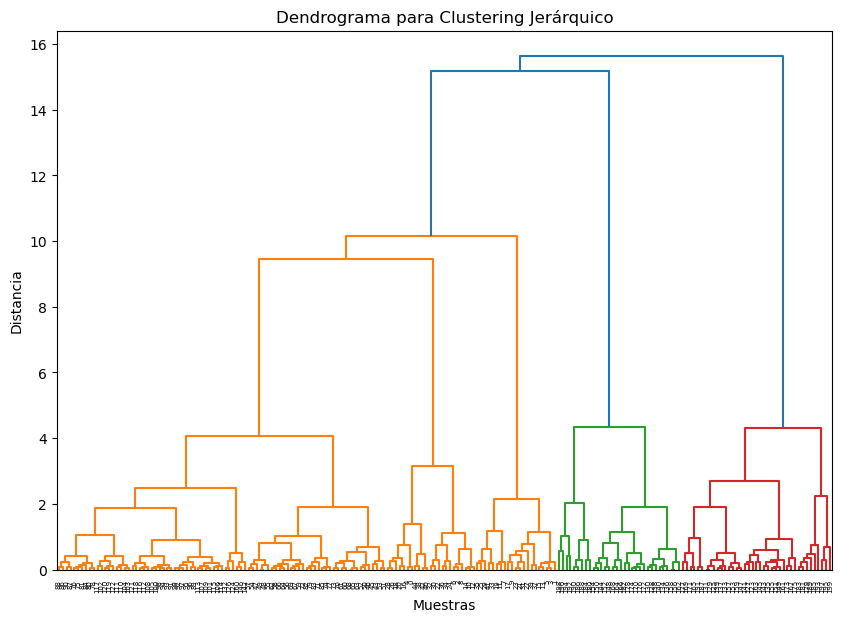

In [15]:

# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

 En este gráfico, cada fusión (cada rama que se une) representa la combinación de dos clústeres o muestras.
Las ramas largas indican que las muestras o clústeres que se están uniendo tienen gran disimilitud, mientras que las ramas cortas indican que los elementos fusionados son muy similares.
En función de la distancia en el eje Y, puedes determinar cuántos clústeres deseas extraer del análisis de agrupamiento, ya que el corte en el dendrograma a una cierta altura te dará el número de grupos a conservar.

In [16]:


# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=5, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.5538089226688662
Índice de Calinski-Harabasz: 244.41032586596822
Índice de Davies-Bouldin: 0.5778621190740154


### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

 * **Gráfico de Dispersión para Visualización de Clusters**

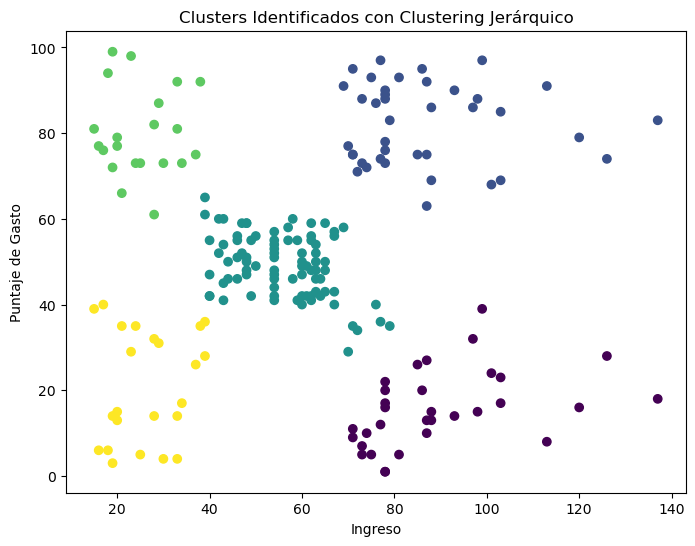

In [17]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=5)  # Ajustar el número de clusters
data['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Ingreso')
plt.ylabel('Puntaje de Gasto')
plt.show()

Este gráfico te muestra cómo se agrupan las muestras según las características seleccionadas, en este caso, Ingreso y Puntaje de gasto. Los puntos de diferentes colores representan diferentes clusters.

### **7. Interpretar, analizar y documentar los resultados obtenidos**

Pendiente

### 8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados
   https://github.com/